In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import SGD
from ipywidgets import interact_manual

Using TensorFlow backend.


In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import fashion_mnist

In [4]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

這是 Bag


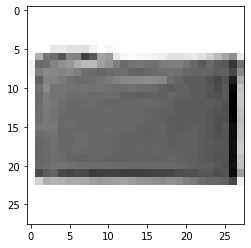

In [6]:
n = 1234
print('這是', class_names[y_train[n]])
plt.imshow(x_train[n], cmap='Greys');

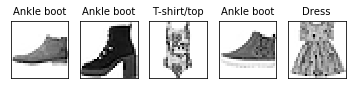

In [7]:
pick = np.random.choice(60000, 5, replace=False)

for i in range(5):
    n = pick[i]
    ax = plt.subplot(151+i)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.set_title(class_names[y_train[n]], fontsize=10)
    plt.imshow(x_train[n], cmap='Greys')  


In [8]:
x_train.shape

(60000, 28, 28)

In [9]:
x_test.shape

(10000, 28, 28)

In [10]:
x_train=x_train.reshape(60000,784)

In [11]:
x_test=x_test.reshape(10000,784)

In [12]:
x_train

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=uint8)

In [13]:
from tensorflow.keras.utils import to_categorical

In [14]:
y_train=to_categorical(y_train,10)

In [15]:
y_test=to_categorical(y_test,10)

In [16]:
y_train[n]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [18]:
model = Sequential()

### 更改神經元數量，並改一種輸出方式

In [19]:
model.add(Dense(300, input_dim = 784, activation='sigmoid'))
model.add(Dense(200, activation='relu'))
model.add(Dense(2000, activation='relu')) ###改了神經元數量
model.add(Dense(10, activation='sigmoid')) ### 換一種方式

In [20]:
### 組裝我們的神經網路

In [21]:
model.compile(loss="mse",optimizer=SGD(lr=0.087),metrics=["accuracy"])

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 300)               235500    
_________________________________________________________________
dense_1 (Dense)              (None, 200)               60200     
_________________________________________________________________
dense_2 (Dense)              (None, 2000)              402000    
_________________________________________________________________
dense_3 (Dense)              (None, 10)                20010     
Total params: 717,710
Trainable params: 717,710
Non-trainable params: 0
_________________________________________________________________


### 改成訓練66次

In [23]:
model.fit(x_train,y_train,batch_size=100,epochs=66) ### 更改訓練次數

Epoch 1/66
60000/60000 [==============================] - 3s 54us/sample - loss: 0.0716 - accuracy: 0.5537
Epoch 2/66
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0417 - accuracy: 0.7449
Epoch 3/66
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0333 - accuracy: 0.7869
Epoch 4/66
60000/60000 [==============================] - 3s 50us/sample - loss: 0.0298 - accuracy: 0.8076
Epoch 5/66
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0278 - accuracy: 0.8181
Epoch 6/66
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0265 - accuracy: 0.8247
Epoch 7/66
60000/60000 [==============================] - 3s 55us/sample - loss: 0.0258 - accuracy: 0.8290
Epoch 8/66
60000/60000 [==============================] - 3s 57us/sample - loss: 0.0251 - accuracy: 0.8339
Epoch 9/66
60000/60000 [==============================] - 3s 51us/sample - loss: 0.0246 - accuracy: 0.8359
Epoch 10/66
60000/60000 [============

In [25]:
### 訓練成本

In [26]:
result=model.predict_classes(x_test)

In [27]:
result

array([9, 2, 1, ..., 8, 1, 5], dtype=int64)

In [45]:
def my_predict(n):
    print('這是', class_names[result[n]])
    x=x_test[n].reshape(28,28)
    plt.imshow(x,cmap='Greys')
interact_manual(my_predict,n=(0,2000))

interactive(children=(IntSlider(value=1000, description='n', max=2000), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>

這是 T-shirt/top


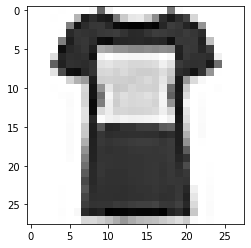

In [59]:
n = 1214
print('這是', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

這是 Sandal


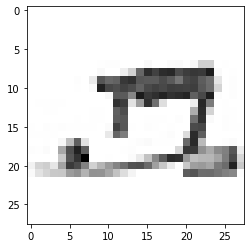

In [60]:
n = 1211
print('這是', class_names[result[n]])
plt.imshow(x_test[n].reshape(28,28), cmap='Greys');

# 製作對照組 100,87個神經元 20次訓練次數 再換輸出方式

In [51]:
model1 = Sequential()
model1.add(Dense(300, input_dim = 784, activation='sigmoid'))
model1.add(Dense(100, activation='relu'))
model1.add(Dense(87, activation='relu')) ###改了神經元數量
model1.add(Dense(10, activation='softmax')) ### 換一種方式
model1.compile(loss="mse",optimizer=SGD(lr=0.087),metrics=["accuracy"])

In [52]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 300)               235500    
_________________________________________________________________
dense_13 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_14 (Dense)             (None, 87)                8787      
_________________________________________________________________
dense_15 (Dense)             (None, 10)                880       
Total params: 275,267
Trainable params: 275,267
Non-trainable params: 0
_________________________________________________________________


In [53]:
model1.fit(x_train,y_train,batch_size=100,epochs=20) ### 更改訓練次數

Epoch 1/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0591 - accuracy: 0.5840
Epoch 2/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0336 - accuracy: 0.7763
Epoch 3/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0288 - accuracy: 0.8048
Epoch 4/20
60000/60000 [==============================] - 1s 21us/sample - loss: 0.0268 - accuracy: 0.8162
Epoch 5/20
60000/60000 [==============================] - 1s 23us/sample - loss: 0.0262 - accuracy: 0.8208
Epoch 6/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0254 - accuracy: 0.8259
Epoch 7/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0246 - accuracy: 0.8300
Epoch 8/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0248 - accuracy: 0.8290
Epoch 9/20
60000/60000 [==============================] - 1s 22us/sample - loss: 0.0248 - accuracy: 0.8298
Epoch 10/20
60000/60000 [============

In [24]:
result1=model.predict_classes(x_test)

In [25]:
def my_predict(n):
    print('這是', class_names[result1[n]])
    x=x_test[n].reshape(28,28)
    plt.imshow(x,cmap='Greys')
interact_manual(my_predict,n=(0,2000))

interactive(children=(IntSlider(value=1000, description='n', max=2000), Button(description='Run Interact', sty…

<function __main__.my_predict(n)>